# EDA and FE MICROPROJECT_DHANALAKSHMI. 10drossdl@gmail.com

## DATA LOADING AND PACKAGES IMPORTING

In [1]:
#All the necessary packages are imported
import pandas as pd
import numpy as np
import os
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
#Loading the data files
df1=pd.read_csv('./age_band.csv',sep='\\t',error_bad_lines=False) #loading the age_band data file.  
# Error_bad lines is set to False as we want the error causing rows to be dropped and only that data frame is returned.
df2=pd.read_excel('./car_loan.xlsx',sheet_name='Sheet1') 
df3=pd.read_excel('./car_loan.xlsx',sheet_name='Sheet2')

In [5]:
df1.head() # age band data. We see that the columns have special characters. Need to rename in the next step of data processing

,"""cust.ID",age-band,"Debt.To.Income.Ratio"","
0,"""84563",25-39,"0!"","
1,"""78765",25-40,"13.76!"","
2,"""24590",25-41,"8.77!"","
3,"""9061",25-42,"12.24!"","
4,"""47011",25-43,"16.41!"","


In [6]:
df2.head() # car loan file's 1st sheet.

,cust.ID,Amount.Requested for loan,Amount.Funded.By.Investors to bank,Interest.Rate,Loan duration
0,84563.0,8000,8000,7.62#,36 months
1,78765.0,9000,9000,10.16#,36 months
2,24590.0,13000,12975,9.99#,60 months
3,9061.0,10000,10000,14.22#,36 months
4,47011.0,3600,3600,13.67#,36 months


In [7]:
df3.head() #car loan file's 2nd sheet

,cust.ID,Family_incomeIncome,credit_score,Employment.Length,owning a two wheeler
0,84563.0,3500,765-769,NaN,yes
1,78765.0,5166.67,710-714,10 + years,no
2,24590.0,10500,800-804,10+ years,yes
3,9061.0,2541.67,680-684,8 years,no
4,47011.0,5113,690-694,NaN,yes


## PART 1
### Question 1.
* Check for duplicate columns & remove them
* If you want you can drop column/columns (Mention the reason for the same for removing or not)

In [14]:
# Renaming all columns of the file for better reading.
df1.columns=['Customer_ID','Age_Band','Debt_To_Income_Ratio'] #renaming this as customer id and not cust id as i want to drop the other two.

df2.columns=['Cust_ID','Amount_Requested_Loan','Amount_Funded_By_Investors','Interest_Rate','Loan_Duration']

df3.columns=['Cust_ID', 'Family_Income', 'Credit_Score', 'Employment_Length',
       'Owning_Two_Wheeler']

# we can also rename the columns by using datafram.rename, 
#as we pass the new names in a dictonary with original name as key and new name as value.

In [15]:
df1.info() #checking if changes have been made correctly and also getting information about the data.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2186 entries, 0 to 2185
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Customer_ID           2186 non-null   object
 1   Age_Band              2183 non-null   object
 2   Debt_To_Income_Ratio  2186 non-null   object
dtypes: object(3)
memory usage: 51.4+ KB


In [16]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2186 entries, 0 to 2185
Data columns (total 5 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Cust_ID                     2185 non-null   float64
 1   Amount_Requested_Loan       2185 non-null   object 
 2   Amount_Funded_By_Investors  2185 non-null   object 
 3   Interest_Rate               2186 non-null   object 
 4   Loan_Duration               2185 non-null   object 
dtypes: float64(1), object(4)
memory usage: 85.5+ KB


In [17]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2186 entries, 0 to 2185
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Cust_ID             2184 non-null   float64
 1   Family_Income       2183 non-null   object 
 2   Credit_Score        2186 non-null   object 
 3   Employment_Length   2119 non-null   object 
 4   Owning_Two_Wheeler  2185 non-null   object 
dtypes: float64(1), object(4)
memory usage: 85.5+ KB


In [18]:
# Merging all the data into one single dataframe to work on it easily.
df4=pd.concat([df1,df2,df3],axis=1) #conacting along with columns and not index.
df4 #we see that customer ID  data is now repeated thrice in the new dataframe.

,Customer_ID,Age_Band,Debt_To_Income_Ratio,Cust_ID,Amount_Requested_Loan,Amount_Funded_By_Investors,Interest_Rate,Loan_Duration,Cust_ID,Family_Income,Credit_Score,Employment_Length,Owning_Two_Wheeler
0,"""84563",25-39,"0!"",",84563.0,8000,8000,7.62#,36 months,84563.0,3500,765-769,NaN,yes
1,"""78765",25-40,"13.76!"",",78765.0,9000,9000,10.16#,36 months,78765.0,5166.67,710-714,10 + years,no
2,"""24590",25-41,"8.77!"",",24590.0,13000,12975,9.99#,60 months,24590.0,10500,800-804,10+ years,yes
3,"""9061",25-42,"12.24!"",",9061.0,10000,10000,14.22#,36 months,9061.0,2541.67,680-684,8 years,no
4,"""47011",25-43,"16.41!"",",47011.0,3600,3600,13.67#,36 months,47011.0,5113,690-694,NaN,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2181,"""101795",45-55,"10.22!"",",101795.0,10000,550,10.59#,36 months,101795.0,2083.33,685-689,< 1 year,no
2182,"""84805",45-55,"27.07!"",",84805.0,13225,13225,15.31#,36 months,84805.0,5833.33,680-684,10+ years,yes
2183,"""101548",45-55,"6.37!"",",101548.0,10000,525,14.7#,36 months,101548.0,5416.67,645-649,< 1 year,no
2184,"""3209",45-55,"15!"",",3209.0,12000,11725,9.63#,36 months,3209.0,3000,750-754,< 1 year,yes


In [19]:
# We will remove the duplicate Cust_ID columns.
df4.drop('Cust_ID',axis=1,inplace=True)
df=df4.copy() # copying the data as i do not want to make changes to the main dataset.
df.head()

,Customer_ID,Age_Band,Debt_To_Income_Ratio,Amount_Requested_Loan,Amount_Funded_By_Investors,Interest_Rate,Loan_Duration,Family_Income,Credit_Score,Employment_Length,Owning_Two_Wheeler
0,"""84563",25-39,"0!"",",8000,8000,7.62#,36 months,3500,765-769,NaN,yes
1,"""78765",25-40,"13.76!"",",9000,9000,10.16#,36 months,5166.67,710-714,10 + years,no
2,"""24590",25-41,"8.77!"",",13000,12975,9.99#,60 months,10500,800-804,10+ years,yes
3,"""9061",25-42,"12.24!"",",10000,10000,14.22#,36 months,2541.67,680-684,8 years,no
4,"""47011",25-43,"16.41!"",",3600,3600,13.67#,36 months,5113,690-694,NaN,yes


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2186 entries, 0 to 2185
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Customer_ID                 2186 non-null   object
 1   Age_Band                    2183 non-null   object
 2   Debt_To_Income_Ratio        2186 non-null   object
 3   Amount_Requested_Loan       2185 non-null   object
 4   Amount_Funded_By_Investors  2185 non-null   object
 5   Interest_Rate               2186 non-null   object
 6   Loan_Duration               2185 non-null   object
 7   Family_Income               2183 non-null   object
 8   Credit_Score                2186 non-null   object
 9   Employment_Length           2119 non-null   object
 10  Owning_Two_Wheeler          2185 non-null   object
dtypes: object(11)
memory usage: 188.0+ KB


In [21]:
# We see from the above info that the total size of the data frame is 2186,
#and even though there are all non_null values, some rows are empty. Which indicates cleaning and processing is required in the next steps.

#### SOLUTION:
* We see that there are columns which were repated mainly customer ID. Even though the data looked different ( as in df1 had " before the number)
* So to make the data more clean and to avoid duplication and anamoly, it is best to drop/delete the 2 columns and keep 1.

### Question 2. 
Using seaborn/matplotlib give any two visuals and mention the insights.

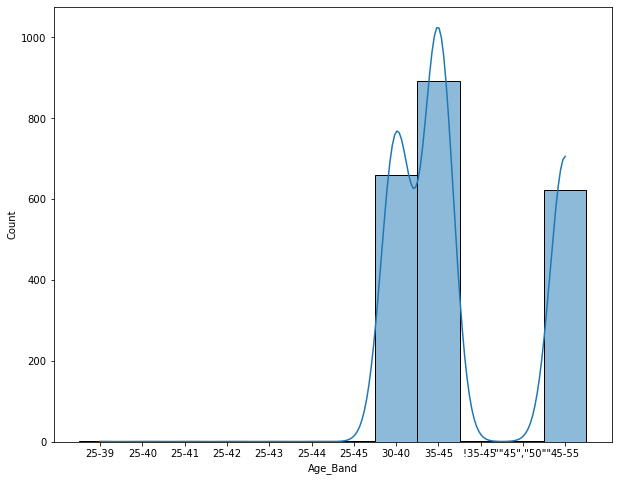

In [43]:
plt.figure(figsize=(10,8))
sns.histplot(data=df,x='Age_Band',kde=True)
# I have not set bins size as bins is for numeric data and not categorical. Here in this Data Frame everything is Object data type.
plt.show()

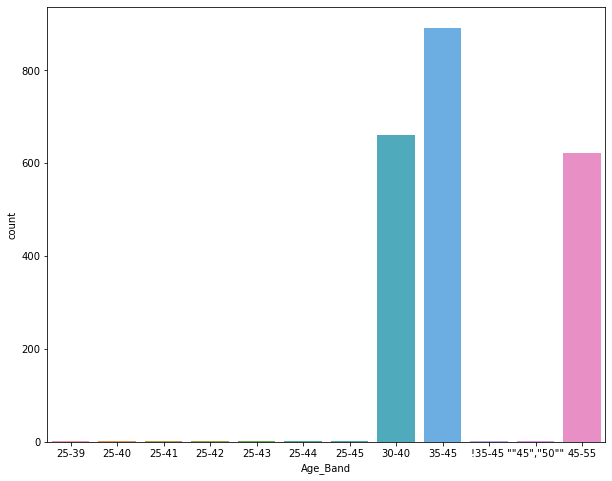

In [42]:
plt.figure(figsize=(10,8))
sns.countplot(data=df,x='Age_Band')
plt.show()

In [64]:
# I did not use barplot as it requires numeric data and Age_band is in object data type.
# Horizontal orientation requires numeric `x` variable.

### Inference 1:

* From the above histogram and countplot we see that the age group around 35-45 are the largest age group which apply for loan, followed by 30-40 being the second highest.
* We can also see how the data is not complete clean as there are special characters from 35-50 age group. So inference is best made after cleaning the data.

In [34]:
# When tried to draw insights regarding amount_requested_for_loan column we get the error as below. 
# Indicating there are data which needs to be cleaned.

#sns.histplot(data=df,x='Amount_Requested_Loan',kde=True,bins=50)
#ValueError: Unable to parse string "." at position 362

In [58]:
dfpie=df['Loan_Duration'].value_counts().index
dfpie # For labels in the pie chart

Index(['36 months', '60 months', '.', '>= 36 months'], dtype='object')

In [59]:
count=df['Loan_Duration'].value_counts().values
count # the no of values for each label

array([1716,  467,    1,    1], dtype=int64)

In [ ]:
# We see from the above that there are 1 data which has an undefined value ".". This also indicates that data should be cleaned.

<function matplotlib.pyplot.show(close=None, block=None)>

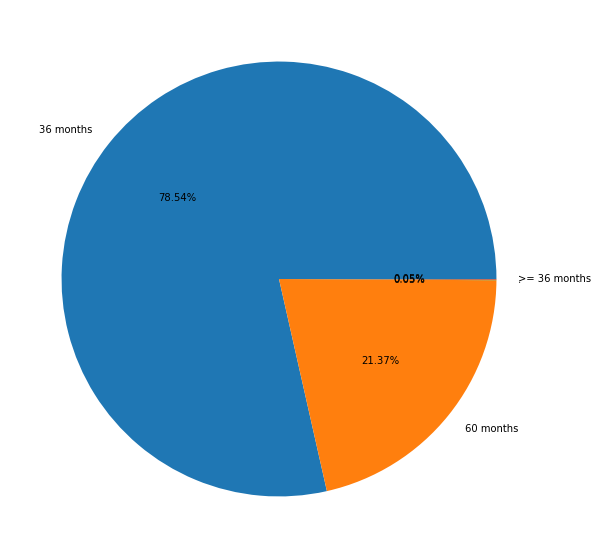

In [61]:
plt.figure(figsize=(20,10))
plt.pie(count,labels=dfpie,autopct='%.2f%%')
plt.show

### Inference 1:

* From the above pie chart we see that the highest or max loan duration is for 36 months i.e 3 years, followed by  60 months i.e 5 years being the second highest.
* We also need to make a note on how all the data in this dataset is in categorical data. And most importantly  almost all the columns have rows of undefined or clutter data, which needs to be cleaned to actually come up with the right inference.

#### * Since the questions were asked in this order I am doing inference first and then clean. But once after cleaning the above graphs will be revisualized.

### Question 3.

Clean the data (string cleaning)

### Solution:
* As we saw from the above inferences and futher checking of data we see that the below columns need cleaning.
 1. Columns that have unwanted character that needs to be removed.
    a. Debt_To_Income_Ratio 
    b. Interest Rate
    c. Customer_ID
    d. Credit_Score
    e. Loan_Duration
    f. Age_Band
    g. Owning_Two_Wheeler
    h. Employment_Length
    
Note: Only string cleaning is asked. Not replacement yet.

In [66]:
#a. Debt_To_Income_Ratio
df['Debt_To_Income_Ratio']=df['Debt_To_Income_Ratio'].str.replace('!"','')
df['Debt_To_Income_Ratio']=df['Debt_To_Income_Ratio'].str.replace(',','')
df['Debt_To_Income_Ratio']

0           0
1       13.76
2        8.77
3       12.24
4       16.41
        ...  
2181    10.22
2182    27.07
2183     6.37
2184       15
2185    14.85
Name: Debt_To_Income_Ratio, Length: 2186, dtype: object

In [67]:
#b. Interest_Rate
df['Interest_Rate']=df.Interest_Rate.str.replace('#','')
df.Interest_Rate

0        7.62
1       10.16
2        9.99
3       14.22
4       13.67
        ...  
2181    10.59
2182    15.31
2183     14.7
2184     9.63
2185      8.9
Name: Interest_Rate, Length: 2186, dtype: object

In [68]:
#c. Customer_ID
df['Customer_ID']=df['Customer_ID'].str.replace('"','')
df.Customer_ID

0        84563
1        78765
2        24590
3         9061
4        47011
         ...  
2181    101795
2182     84805
2183    101548
2184      3209
2185     42828
Name: Customer_ID, Length: 2186, dtype: object

In [70]:
#d.Credit_Score
df.Credit_Score=df.Credit_Score.str.replace(' !','')
df.Credit_Score

0       765-769
1       710-714
2       800-804
3       680-684
4       690-694
         ...   
2181    685-689
2182    680-684
2183    645-649
2184    750-754
2185    725-729
Name: Credit_Score, Length: 2186, dtype: object

In [74]:
# As the values are in range, it would be advisiable not just to remove "-", but find the average of each 
def Credit_Score_Avg(values):
    x=values.split('-')
    return (int(x[0])+int(x[1]))/2

In [75]:
df.Credit_Score=df.Credit_Score.apply(Credit_Score_Avg)
df.Credit_Score

0       767.0
1       712.0
2       802.0
3       682.0
4       692.0
        ...  
2181    687.0
2182    682.0
2183    647.0
2184    752.0
2185    727.0
Name: Credit_Score, Length: 2186, dtype: float64

In [77]:
#e.Loan_Duration
df.Loan_Duration=df.Loan_Duration.str.replace('.',df.Loan_Duration.mode()[0]) # This is to replace that single value which has ".".
# I am using the highest frequent months to replace this. 
# I am aware that no replacement was asked in the question other than string cleaning. But this will help in visualization futher.

df.Loan_Duration=df.Loan_Duration.str.replace(' 36','36')

# This may not be essential step as i can leave the data to be categorical, but I still wanted to.
df.Loan_Duration=df.Loan_Duration.str.replace(' months','')
df.Loan_Duration=df.Loan_Duration.str.replace('>=','') # I am also replacing the single above 60 months value to 60 months data itself 
#as the count is negligible.

df.Loan_Duration.value_counts()

36    1718
60     467
Name: Loan_Duration, dtype: int64

In [79]:
#f.Age_Band
df.Age_Band=df.Age_Band.str.replace('"','')
df.Age_Band=df.Age_Band.str.replace(',','-')
df.Age_Band=df.Age_Band.str.replace('!','')
df.Age_Band

0       25-39
1       25-40
2       25-41
3       25-42
4       25-43
        ...  
2181    45-55
2182    45-55
2183    45-55
2184    45-55
2185    45-55
Name: Age_Band, Length: 2186, dtype: object

In [81]:
#g.Owning_Two_Wheeler
df['Owning_Two_Wheeler']=df.Owning_Two_Wheeler.str.replace(' !','')
df['Owning_Two_Wheeler']=df.Owning_Two_Wheeler.str.replace('!','yes')
df['Owning_Two_Wheeler']=df.Owning_Two_Wheeler.str.replace('yes ','yes')
df['Owning_Two_Wheeler']=df.Owning_Two_Wheeler.str.replace('noo','no')
df['Owning_Two_Wheeler']=df.Owning_Two_Wheeler.str.replace('noo','no')
df.Owning_Two_Wheeler.value_counts()

yes    1093
no     1092
Name: Owning_Two_Wheeler, dtype: int64

In [ ]:
#h. Employment_Length

temp=df.Employment_Length.value_counts().index.to_list()
unwanted_chars=[]
for i in temp:
    unwanted_chars.append(i.split()[-1])

unwanted_chars=list(set(unwanted_chars))

for i in unwanted_chars:
    df['Employment_Length']=df.Employment_Length.str.replace(i,'')
special_chars=['+','< '," 's",'s',' -',' -s']
for i in special_chars:
    df['Employment_Length']=df.Employment_Length.str.replace(i,'')

In [86]:
df.Employment_Length

0        NaN
1       10  
2        10 
3         8 
4        NaN
        ... 
2181      1 
2182     10 
2183      1 
2184      1 
2185      6 
Name: Employment_Length, Length: 2186, dtype: object

In [87]:
# COnverting the following columns which are in object data type to numeric
for column in ['Customer_ID', 'Debt_To_Income_Ratio', 'Amount_Requested_Loan', 'Amount_Funded_By_Investors', 'Interest_Rate', 'Family_Income', 'Credit_Score', 'Employment_Length']:
    if df[column].dtype == 'object':
        df[column] = pd.to_numeric(df[column], errors='coerce')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2186 entries, 0 to 2185
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Customer_ID                 2185 non-null   float64
 1   Age_Band                    2183 non-null   object 
 2   Debt_To_Income_Ratio        2185 non-null   float64
 3   Amount_Requested_Loan       2181 non-null   float64
 4   Amount_Funded_By_Investors  2177 non-null   float64
 5   Interest_Rate               2186 non-null   float64
 6   Loan_Duration               2185 non-null   object 
 7   Family_Income               2177 non-null   float64
 8   Credit_Score                2186 non-null   float64
 9   Employment_Length           2118 non-null   float64
 10  Owning_Two_Wheeler          2185 non-null   object 
dtypes: float64(8), object(3)
memory usage: 188.0+ KB


### Answering Question 2 Again for better inference as the data is cleaned.


<function matplotlib.pyplot.show(close=None, block=None)>

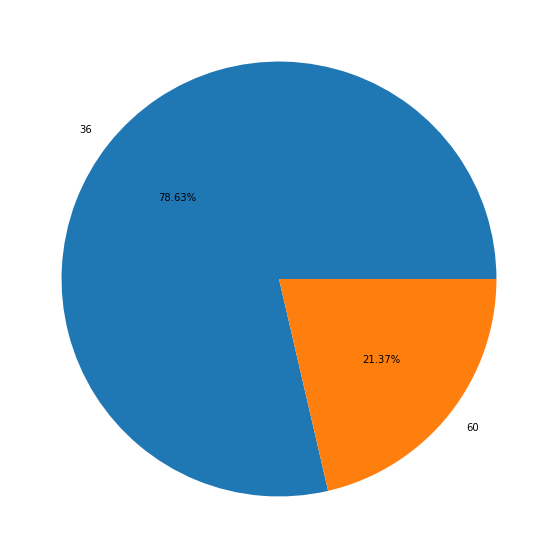

In [89]:
dfpie=df['Loan_Duration'].value_counts().index
dfpie # For labels in the pie chart
count=df['Loan_Duration'].value_counts().values
count # the no of values for each label
plt.figure(figsize=(20,10))
plt.pie(count,labels=dfpie,autopct='%.2f%%')
plt.show

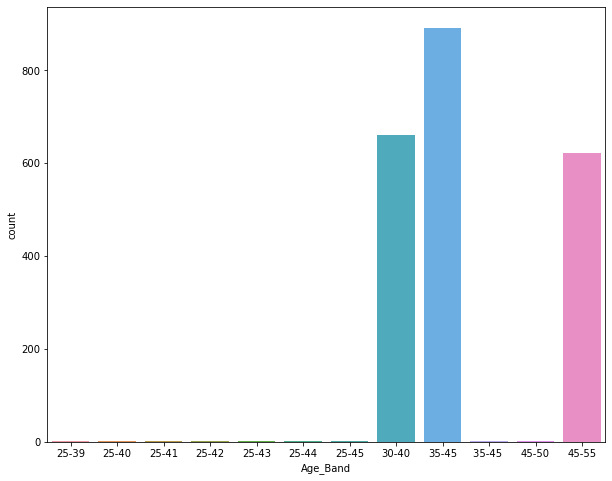

In [90]:
plt.figure(figsize=(10,8))
sns.countplot(data=df,x='Age_Band')
plt.show()

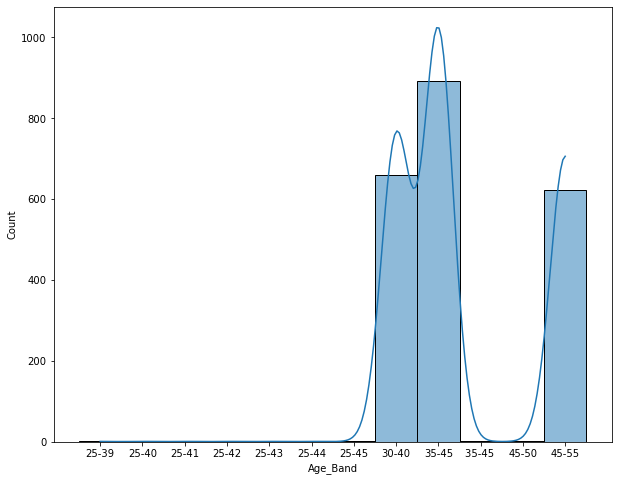

In [91]:
plt.figure(figsize=(10,8))
sns.histplot(data=df,x='Age_Band',kde=True)
plt.show()

<AxesSubplot:xlabel='Amount_Requested_Loan', ylabel='Count'>

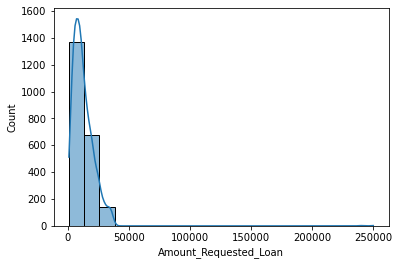

In [94]:
sns.histplot(data=df,x='Amount_Requested_Loan',kde=True,bins=20)

### Question 4
Check for outliers present in the data, decide whether you want to remove them or not. Justify the same

In [128]:
from scipy import stats
#Writting a function as doing the same steps for each column will be time consuming.
def outliers_search(df):
    columns = ['Amount_Requested_Loan','Amount_Funded_By_Investors','Debt_To_Income_Ratio', 'Family_Income', 'Credit_Score', 'Employment_Length']
    outliers = []
    
    for i in columns:
        #IQR = stats.iqr(df[i], interpolation = 'midpoint')
        Q1 = np.percentile(df[i], 25, interpolation='midpoint') #i+j/2 ie finding the mid point.
        Q3 = np.percentile(df[i], 75, interpolation='midpoint')
        IQR = Q3 - Q1
        
        lower_bound = Q1 - (1.5 * IQR)
        upper_bound = Q3 + (1.5 * IQR)

        out_df = df[(df[i] < lower_bound) | (df[i] > upper_bound)]
        outliers.append(out_df.shape[0])
        
        print(f'{i} Lower bound is {lower_bound}, Upper bound is {upper_bound}')
    df_outliers=pd.DataFrame({'Feature Name':columns,'Total_Outliers':outliers})
    
    return df_outliers

In [129]:
outliers_search(df)

Amount_Requested_Loan Lower bound is nan, Upper bound is nan
Amount_Funded_By_Investors Lower bound is nan, Upper bound is nan
Debt_To_Income_Ratio Lower bound is nan, Upper bound is nan
Family_Income Lower bound is nan, Upper bound is nan
Credit_Score Lower bound is 614.5, Upper bound is 794.5
Employment_Length Lower bound is nan, Upper bound is nan


,Feature Name,Total_Outliers
0,Amount_Requested_Loan,0
1,Amount_Funded_By_Investors,0
2,Debt_To_Income_Ratio,0
3,Family_Income,0
4,Credit_Score,49
5,Employment_Length,0


### Inference
* We see that there are 49 Values in Credit score.
* Since that is a small amount of data when compared to overall, we can delete the values.

In [130]:
Q1 = np.percentile(df['Credit_Score'], 25, interpolation='midpoint')
Q3 = np.percentile(df['Credit_Score'], 75, interpolation='midpoint')
IQR = Q3 - Q1
low_bound = Q1 - (1.5 * IQR)
upper_bound = Q3 + (1.5 * IQR)

#Removing the outliers from the dataset.
outliers= df[(df['Credit_Score'] < low_bound) | (df['Credit_Score'] > upper_bound)]
filtered_df=df[~df['Customer_ID'].isin(outliers.Customer_ID)]

In [131]:
outliers_search(filtered_df)

Amount_Requested_Loan Lower bound is nan, Upper bound is nan
Amount_Funded_By_Investors Lower bound is nan, Upper bound is nan
Debt_To_Income_Ratio Lower bound is nan, Upper bound is nan
Family_Income Lower bound is nan, Upper bound is nan
Credit_Score Lower bound is 602.0, Upper bound is 802.0
Employment_Length Lower bound is nan, Upper bound is nan


,Feature Name,Total_Outliers
0,Amount_Requested_Loan,0
1,Amount_Funded_By_Investors,0
2,Debt_To_Income_Ratio,0
3,Family_Income,0
4,Credit_Score,0
5,Employment_Length,0


## PART 2 
### Question 1. 
How much missing data is there in the dataset? What's the impact of missing data on analysis and modelling

In [135]:
def missing_values():
    missing_values_df=filtered_df.isnull().sum().reset_index().rename(columns={'index':'Feature_name',0:'Missing_values'})
    missing_values_df['% of missing']=(missing_values_df['Missing_values']/filtered_df.shape[0])*100
    total_per_missing=missing_values_df['% of missing'].sum()
    missing_values_df['% of missing']=missing_values_df['% of missing'].apply(lambda x: f'{x:.2f}%')
    return total_per_missing,missing_values_df

In [136]:
print(missing_values()[0])
missing_values()[1]

4.398689751988769


,Feature_name,Missing_values,% of missing
0,Customer_ID,1,0.05%
1,Age_Band,3,0.14%
2,Debt_To_Income_Ratio,1,0.05%
3,Amount_Requested_Loan,5,0.23%
4,Amount_Funded_By_Investors,9,0.42%
5,Interest_Rate,0,0.00%
6,Loan_Duration,1,0.05%
7,Family_Income,6,0.28%
8,Credit_Score,0,0.00%
9,Employment_Length,67,3.14%


### Inference :
* We see that the missing data is less than 3.5% max with Employment_Length being the highest of 3.14%.
* This shows that these missing values will have the least amount of impact on the calculations.
* Yet we  can immpute the missing values if we choose to like below.

### Question 2
Do the missing value imputation for numerical & categorical data

In [137]:
# Categorical imputation is done by using mode    
def categorical_imputation(column):
    filtered_df[column]=filtered_df[column].fillna(filtered_df[column].mode()[0])
    
# Numerical imputation is done by using mean    
def numerical_imputation(column):
    filtered_df[column]=filtered_df[column].fillna(filtered_df[column].mean())

In [138]:
column=['Age_Band', 'Debt_To_Income_Ratio', 'Amount_Requested_Loan', 'Amount_Funded_By_Investors', 'Interest_Rate', 'Loan_Duration', 'Family_Income', 'Credit_Score', 'Employment_Length', 'Owning_Two_Wheeler']
for i in column:
    if filtered_df[i].dtype == 'O':
        categorical_imputation(i)
    else:
        numerical_imputation(i)
print(missing_values()[0])
missing_values()[1]

0.04679457182966776


,Feature_name,Missing_values,% of missing
0,Customer_ID,1,0.05%
1,Age_Band,0,0.00%
2,Debt_To_Income_Ratio,0,0.00%
3,Amount_Requested_Loan,0,0.00%
4,Amount_Funded_By_Investors,0,0.00%
5,Interest_Rate,0,0.00%
6,Loan_Duration,0,0.00%
7,Family_Income,0,0.00%
8,Credit_Score,0,0.00%
9,Employment_Length,0,0.00%


### Question 3.
Which variables in the dataset require one-hot encoding using pd.getdummies?
Treat them accordingly. What is the purpose of using one-hot encoding for these
variables?

In [139]:
filtered_df=pd.get_dummies(filtered_df,prefix=['Age_Band','Loan_Duration','Two_wheeler'])

In [140]:
filtered_df.head()

,Customer_ID,Debt_To_Income_Ratio,Amount_Requested_Loan,Amount_Funded_By_Investors,Interest_Rate,Family_Income,Credit_Score,Employment_Length,Age_Band_25-39,Age_Band_25-40,...,Age_Band_25-45,Age_Band_30-40,Age_Band_35-45,Age_Band_35-45,Age_Band_45-50,Age_Band_45-55,Loan_Duration_36,Loan_Duration_60,Two_wheeler_no,Two_wheeler_yes
0,84563.0,0.00,8000.0,8000.0,7.62,3500.00,767.0,5.448309,1,0,...,0,0,0,0,0,0,1,0,0,1
1,78765.0,13.76,9000.0,9000.0,10.16,5166.67,712.0,10.000000,0,1,...,0,0,0,0,0,0,1,0,1,0
3,9061.0,12.24,10000.0,10000.0,14.22,2541.67,682.0,8.000000,0,0,...,0,0,0,0,0,0,1,0,1,0
4,47011.0,16.41,3600.0,3600.0,13.67,5113.00,692.0,5.448309,0,0,...,0,0,0,0,0,0,1,0,0,1
5,21789.0,29.82,7350.0,7350.0,10.74,5000.00,747.0,4.000000,0,0,...,0,0,0,0,0,0,0,1,1,0


### Question 4.
Is there a correlation between two numerical variables? Is it positive or negative

In [141]:
correlation_matrix=filtered_df.corr()

In [142]:
x=filtered_df.columns.to_list()
print(x)

['Customer_ID', 'Debt_To_Income_Ratio', 'Amount_Requested_Loan', 'Amount_Funded_By_Investors', 'Interest_Rate', 'Family_Income', 'Credit_Score', 'Employment_Length', 'Age_Band_25-39', 'Age_Band_25-40', 'Age_Band_25-42', 'Age_Band_25-43', 'Age_Band_25-44', 'Age_Band_25-45', 'Age_Band_30-40', 'Age_Band_35-45', 'Age_Band_35-45 ', 'Age_Band_45-50', 'Age_Band_45-55', 'Loan_Duration_36', 'Loan_Duration_60', 'Two_wheeler_no', 'Two_wheeler_yes']


In [143]:
features=['Amount_Requested_Loan','Family_Income']
corel_coeff=np.corrcoef(filtered_df[features[0]],filtered_df[features[1]])[0,1]
if corel_coeff > 0:
    print(f'\033[1;34mPositive Correlation \033[m between Loan Requested and Family Income with correlation coefficient \033[1;34m{corel_coeff}')
elif corel_coeff <0:
    print(f'\033[1;34mNegative Correlation \033[m between Loan Requested and Family Income with correlation coefficient \033[1;34m{corel_coeff}')
else:
    print(f'\033[1;34mNo Correlation \033[m between Loan Requested and Family Income with correlation coefficient \033[1;34m{corel_coeff}')

Positive Correlation  between Loan Requested and Family Income with correlation coefficient 0.31439786873770253
